In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 초기화

In [62]:
def Perceptron(x1, x2):
    #임의의 가중치 설정([-0.5, 0,5]구간의 임의의 값으로 설정.)
    w1,w2 = 0.5, 0.5
    
    #임의의 임계값 theta 설정.
    theta = 0.1
    
    #출력값 y
    y = w1*x1 + w2*x2
    
    return y, y >= theta

## 활성화 - 계단 활성화 함수로 출력.

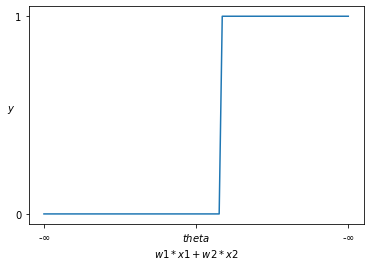

In [63]:
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)

y_value, y_result = Perceptron(x1,x2)

plt.plot(y_value, y_result)
plt.yticks([0,1])
plt.xticks([-3,0,3], [r'-$\infty$', r'$theta$',r'-$\infty$'])
plt.xlabel(r"$w1*x1 + w2*x2$")
plt.ylabel(r"$y$", rotation = 0)
plt.show()

In [123]:
## 편향과 가중치를 도입하지 않았을 때.
def AND(x1, x2):
    w1,w2 = 0.5, 0.5
    theta = 0.1
    
    #출력값 y
    y = w1*x1 + w2*x2
    
    if y <= theta :
        return 0
    elif y > theta:
        return 1
   
    print ("최종 가중치")
    print (y)
    
    
print(AND(0,0), AND(1,0), AND(0,1), AND(1,1))

0 1 1 1


## 편향과 가중치를 도입해야 하는 이유.
가중치는 입력괎에 대한 중요도를 나타내고, 각각의 입력값이 출력값에 얼마나 영향을 미치게 할 것인가를 의미한다.
- 가중치가 크다 : 입력값이 출력값에 영향을 많이 끼친다.
- 가중치가 작다 : 입력값이 출력값에 영향을 거의 받지 않는다.

편향은 퍼셉트론이 얼마나 쉽게 활성화 되는가를 결정해 준다.
보통 '활성화' 되었다는 퍼셉트론이 결과물이 1이 되면 활성화 되었다고 한다.
- 편향이 클 때 : 퍼셉트론의 흥분도가 커져 쉽게 활성화 된다.(민감)
- 편향이 작을 때 : 퍼셉트론의 흥분도가 낮아져서 활성화가 잘 안된다.(둔감)

In [75]:
x = np.array([0,1])
w = np.array([0.5,0.5])
b = -0.1 #편향

print("행렬 곱 : {}".format(w*x))
print("각 원소의 곱을 합한 결과 : {}".format(np.sum(w*x)))
print("편향 추가 계산 : {:.1f}".format(np.sum(w*x) + b))

행렬 곱 : [0.  0.5]
각 원소의 곱을 합한 결과 : 0.5
편향 추가 계산 : 0.4


In [136]:
def AND(x1, x2):
    x = np.array([x1,x2]) #입력값
    w = np.array([0.5,0.5]) #가중치
    b = -0.1 #편향
    
    #출력값 y
    y = np.sum(w*x) + b
    
    print ("최종 가중치")
    print (y)
    return int(y>0)
 
print("< AND gate results >")
print(AND(0,0), AND(1,0), AND(0,1), AND(1,1))

< AND gate results >
최종 가중치
-0.1
최종 가중치
0.4
최종 가중치
0.4
최종 가중치
0.9
0 1 1 1


In [139]:
def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = 0.4 
    
    #출력값 y
    y = np.sum(w*x) + b
    
    print ("최종 가중치")
    print (y)
    
    if y <= 0 :
        return 0
    else : 
        return 1 

print("< OR gate results >")
print(OR(0,0), OR(1,0), OR(0,1), OR(1,1))

< OR gate results >
최종 가중치
0.4
최종 가중치
0.9
최종 가중치
0.9
최종 가중치
1.4
1 1 1 1


## NAND gate 연산이 필요한 이유.
XOR 게이트의 그래프를 OR 그래프와 같이 직선으로 분할할 수 없다. XOR 게이트의 그래프를 분할하기 위해서는 곡선 그래프어야 한다. 따라서 단층 퍼셉트론으로 구현하는 것에 한계가 있기에, XOR 게이트의 연산을 위하여 NAND 게이트를 구현한다.

In [140]:
def NAND(x1, x2):
    #가중치와 편향을 반대로 하여 값을 구한다.
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.1
    
    #출력값 y
    y = np.sum(w*x) + b
    
    print ("최종 가중치")
    print (y)
    return int(y>0)

print("< NAND gate results >")
print(NAND(0,0), NAND(1,0), NAND(0,1), NAND(1,1))

< NAND gate results >
최종 가중치
0.1
최종 가중치
-0.4
최종 가중치
-0.4
최종 가중치
-0.9
1 0 0 0


## XOR 연산을 위해 단층 퍼셉트론을 층으로 쌓아 연산한다.

In [141]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    
    #출력값 z
    z = AND(s1,s2)
    
    print ("-XOR 연산의 최종 가중치-")
    print (z)
    return z

print("< XOR gate results >")
print(XOR(0,0), XOR(1,0), XOR(0,1), XOR(1,1))

< XOR gate results >
최종 가중치
0.1
최종 가중치
0.4
최종 가중치
0.9
-XOR 연산의 최종 가중치-
1
최종 가중치
-0.4
최종 가중치
0.9
최종 가중치
0.4
-XOR 연산의 최종 가중치-
1
최종 가중치
-0.4
최종 가중치
0.9
최종 가중치
0.4
-XOR 연산의 최종 가중치-
1
최종 가중치
-0.9
최종 가중치
1.4
최종 가중치
0.4
-XOR 연산의 최종 가중치-
1
1 1 1 1
